# Анализ метрик моделей на датасете VK

## 1. Подготовка данных


In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

with open('/content/result_metrics_vk_cup.txt', 'r') as f:
    all_lines = f.readlines()

all_lines[:5]

['ALS\n',
 '\n',
 '=========RESULTS=========\n',
 'MAP@1: 1.07117e-07\n',
 'MAP@10: 2.3688e-06\n']

In [54]:
metrics_dict_1 = {}
metrics_dict_2 = {}
last_method_name = ''
for i in range(len(all_lines)):
    cur_line = all_lines[i].replace('\n', '')
    if len(cur_line) == 0 or '=' in cur_line:
        continue
    if ':' not in cur_line:
        last_method_name = cur_line
        continue
    name_metric, value_metric = cur_line.split(':')
    value_metric = float(value_metric)
    if metrics_dict_1.get(last_method_name, None) is None:
        metrics_dict_1[last_method_name] = {}
    if metrics_dict_1[last_method_name].get(name_metric, None) is None:
        metrics_dict_1[last_method_name][name_metric] = value_metric
    else:
        if metrics_dict_2.get(last_method_name, None) is None:
            metrics_dict_2[last_method_name] = {}
        metrics_dict_2[last_method_name][name_metric] = value_metric


In [55]:
metrics_dict_1.keys()

dict_keys(['ALS', 'ImplicitALS', 'SLIM', 'SVD++', 'NGCF + SLIM', 'NGCF', 'NGCF + ALS', 'NGCF + SVD++', 'NGCF + implicit ALS', 'PageRank', 'DSSM', 'RecVAE'])

In [56]:
metrics_dict_2.keys()

dict_keys(['ALS', 'ImplicitALS', 'SLIM', 'SVD++', 'NGCF + SLIM', 'NGCF', 'NGCF + ALS', 'NGCF + SVD++', 'NGCF + implicit ALS', 'PageRank', 'DSSM', 'RecVAE'])

In [58]:
df_1 = pd.DataFrame(metrics_dict_1)
df_1

,ALS,ImplicitALS,SLIM,SVD++,NGCF + SLIM,NGCF,NGCF + ALS,NGCF + SVD++,NGCF + implicit ALS,PageRank,DSSM,RecVAE
MAP@1,2.677925e-07,1.165127e-06,3.414475e-06,1.903377e-06,1.893387e-06,8.418800e-07,1.420040e-06,2.670150e-07,1.765947e-06,1.420040e-06,1.447723e-07,3.550100e-07
MAP@10,5.922000e-07,9.323850e-07,1.065185e-06,8.717875e-07,8.092025e-07,7.720750e-07,6.264950e-07,4.440575e-07,5.649300e-07,7.603825e-07,3.829950e-07,6.323900e-07
MAP@11,5.767909e-07,8.935568e-07,1.053211e-06,8.375409e-07,7.923568e-07,7.577727e-07,6.096045e-07,4.281159e-07,5.697977e-07,7.557227e-07,4.364114e-07,6.276477e-07
MAP@12,5.864292e-07,8.728479e-07,1.029750e-06,8.192188e-07,7.591354e-07,7.496167e-07,5.715813e-07,4.433604e-07,5.329875e-07,7.609500e-07,4.402167e-07,5.943833e-07
MAP@13,5.582442e-07,8.527788e-07,9.820654e-07,8.090423e-07,7.312288e-07,7.402250e-07,5.436481e-07,4.289538e-07,5.171962e-07,7.372712e-07,4.340788e-07,5.712846e-07
MAP@14,5.506661e-07,8.227143e-07,9.582339e-07,8.048464e-07,7.493982e-07,7.388500e-07,5.328357e-07,4.412304e-07,5.093357e-07,7.440179e-07,4.570089e-07,5.819446e-07
MAP@15,5.289050e-07,8.042333e-07,9.296617e-07,7.883983e-07,7.602300e-07,7.334683e-07,5.465683e-07,4.282450e-07,4.989383e-07,7.266817e-07,4.497767e-07,5.643400e-07
MAP@16,5.184984e-07,7.850062e-07,9.009250e-07,7.828687e-07,7.769422e-07,7.205547e-07,5.459781e-07,4.300500e-07,4.919703e-07,7.111141e-07,4.676297e-07,5.632703e-07
MAP@17,5.250868e-07,7.739147e-07,8.730206e-07,7.770971e-07,7.905515e-07,6.985235e-07,5.309912e-07,4.355426e-07,4.824794e-07,6.988103e-07,4.605368e-07,5.497647e-07
MAP@18,5.146681e-07,7.584472e-07,8.596167e-07,7.630194e-07,8.042653e-07,6.876153e-07,5.376375e-07,4.360486e-07,4.735083e-07,6.890556e-07,4.648500e-07,5.398056e-07


In [59]:
df_2 = pd.DataFrame(metrics_dict_2)
df_2

,ALS,ImplicitALS,SLIM,SVD++,NGCF + SLIM,NGCF,NGCF + ALS,NGCF + SVD++,NGCF + implicit ALS,PageRank,DSSM,RecVAE
MAP@1,4.435275e-06,2.561125e-06,3.108200e-06,4.319225e-06,2.840075e-06,2.840075e-06,2.843850e-06,2.840075e-06,2.841900e-06,2.990650e-07,2.883675e-06,0.000017
MAP@10,7.467975e-07,5.744525e-07,5.779025e-07,7.348200e-07,3.771100e-06,5.681975e-07,5.333425e-07,5.525750e-07,5.556150e-06,5.697025e-07,6.344150e-07,0.000004
MAP@11,6.789068e-07,5.222295e-07,5.253659e-07,6.680182e-07,3.428273e-06,5.165432e-07,4.848568e-07,5.023409e-07,5.051045e-06,5.179114e-07,5.767409e-07,0.000004
MAP@12,6.223313e-07,4.787104e-07,4.815854e-07,6.123500e-07,3.142583e-06,4.734979e-07,4.444521e-07,4.604792e-07,4.630125e-06,4.747521e-07,5.286792e-07,0.000004
MAP@13,5.744596e-07,4.418865e-07,4.445404e-07,5.652462e-07,2.900846e-06,4.370750e-07,4.102635e-07,4.250577e-07,4.273962e-06,4.382327e-07,4.880115e-07,0.000003
MAP@14,5.334268e-07,4.103232e-07,4.127875e-07,5.248714e-07,2.693643e-06,4.058554e-07,3.809589e-07,3.946964e-07,3.968679e-06,4.069304e-07,4.531536e-07,0.000003
MAP@15,4.978650e-07,3.829683e-07,3.852683e-07,4.898800e-07,2.514067e-06,3.787983e-07,3.555617e-07,3.683833e-07,3.704100e-06,3.798017e-07,4.229433e-07,0.000003
MAP@16,4.667484e-07,3.590328e-07,3.611891e-07,4.592625e-07,2.356937e-06,3.551234e-07,3.333391e-07,3.453594e-07,3.472594e-06,3.560641e-07,3.965094e-07,0.000003
MAP@17,4.392926e-07,3.379132e-07,3.399426e-07,4.322471e-07,2.218294e-06,3.342338e-07,3.137309e-07,3.250441e-07,3.268324e-06,3.351191e-07,3.731853e-07,0.000003
MAP@18,4.148875e-07,3.191403e-07,3.210569e-07,4.082333e-07,2.095056e-06,3.156653e-07,2.963014e-07,3.069861e-07,3.086750e-06,3.165014e-07,3.524528e-07,0.000002


## 2. Сравнение метрик подхода X и NGCF + X

In [60]:
methods = 'ALS ImplicitALS SLIM	SVD++'.split()


In [61]:
method2ngcf_method = {
    'ALS' : 'NGCF + ALS',
    'ImplicitALS' : 'NGCF + implicit ALS', 
    'SLIM' : 'NGCF + SLIM',
    'SVD++' : 'NGCF + SVD++'
}

### Inference 1

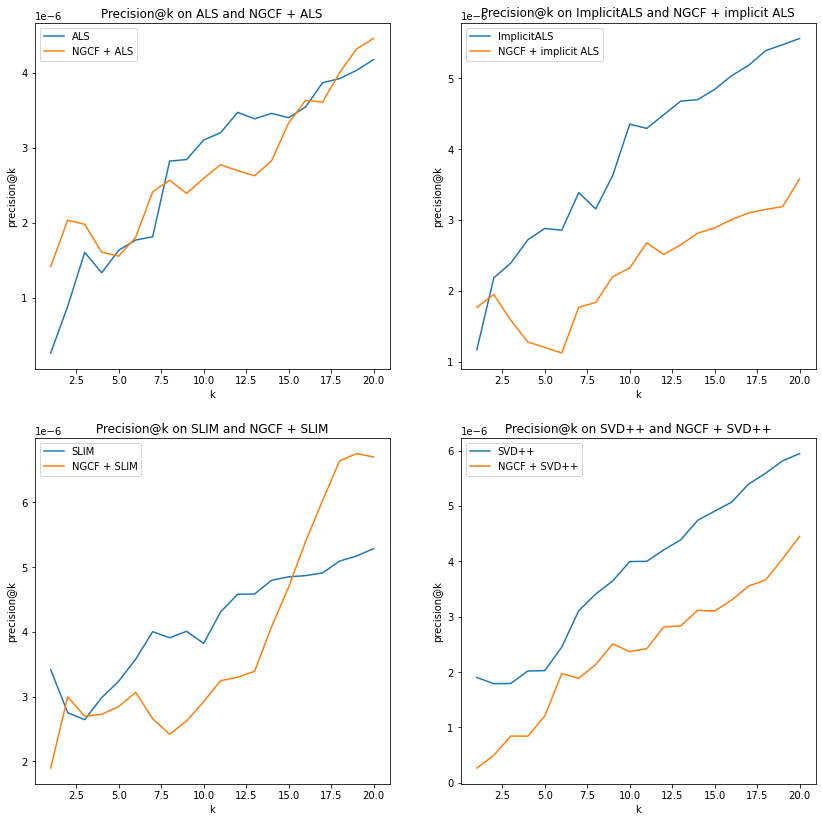

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_1.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_1.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_1.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

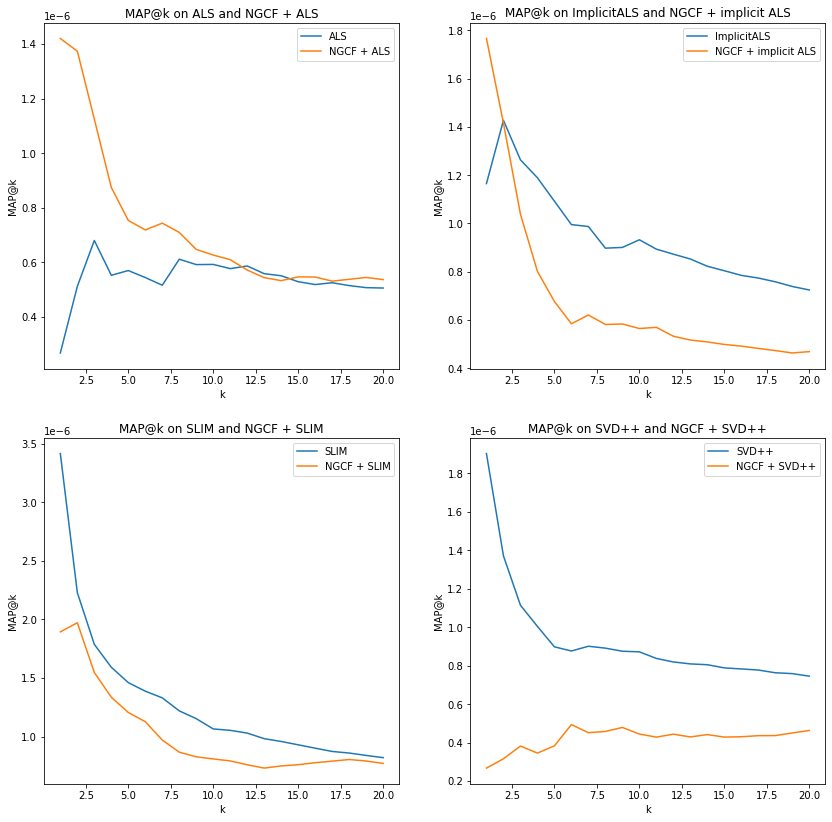

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_1.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_1.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_1.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

### Inference 2

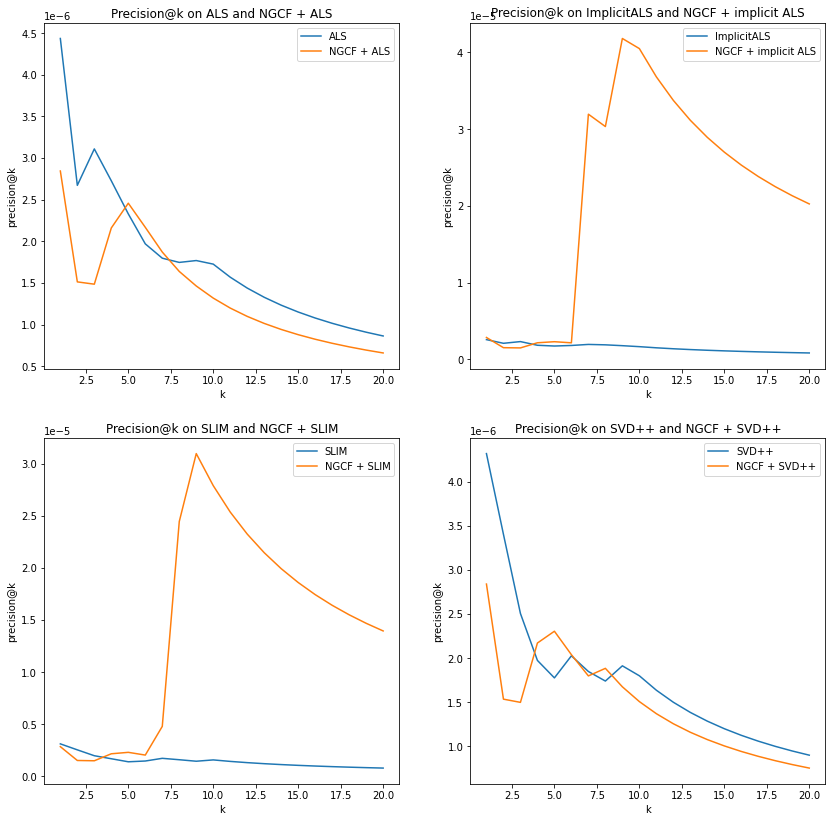

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_2.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_2.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_2.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

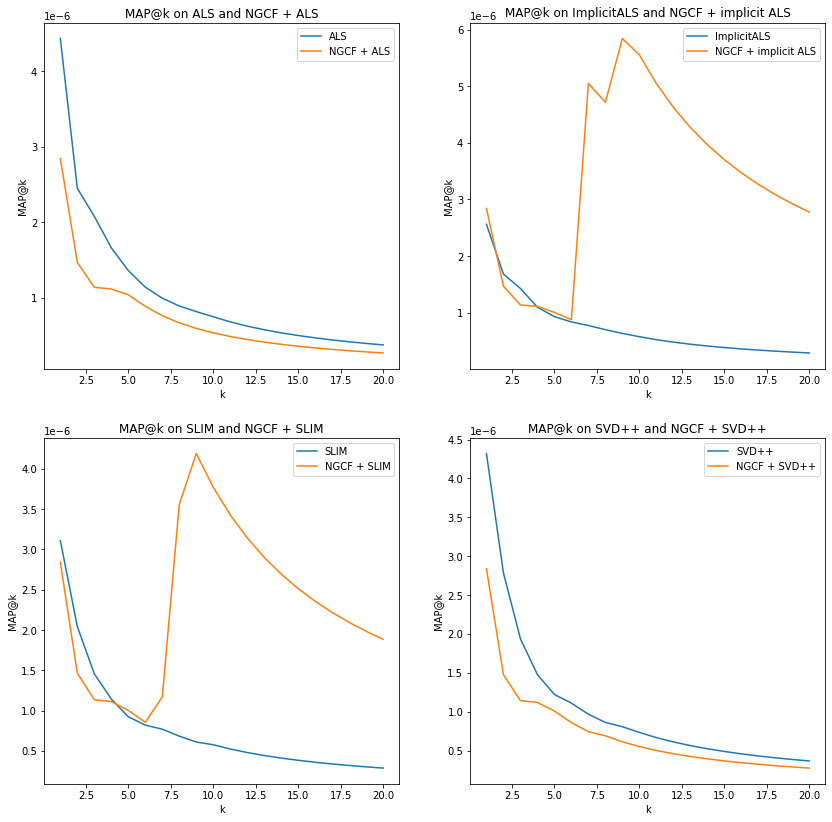

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_2.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_2.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_2.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

### max(inference_1, inference_2)

In [66]:
dict_max = {}
for key1 in metrics_dict_1.keys():
    dict_max[key1] = {}
    for key2 in metrics_dict_1[key1].keys():
        dict_max[key1][key2] = max(metrics_dict_1[key1][key2], metrics_dict_2[key1][key2])

df_max = pd.DataFrame(dict_max)

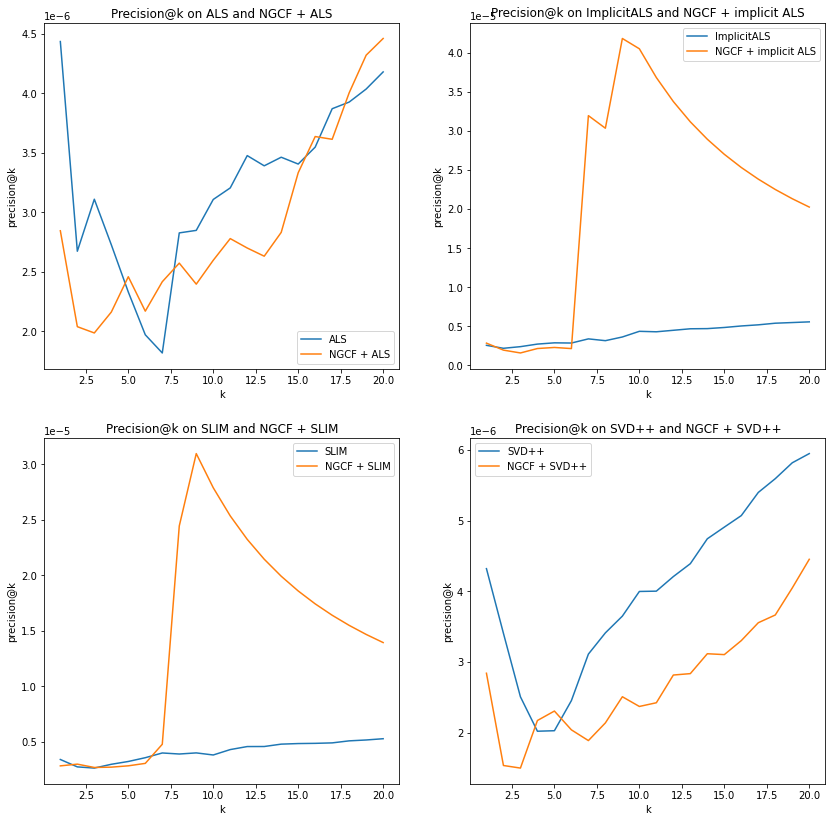

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_max.index: 
        if 'Precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_max.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_max.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"Precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

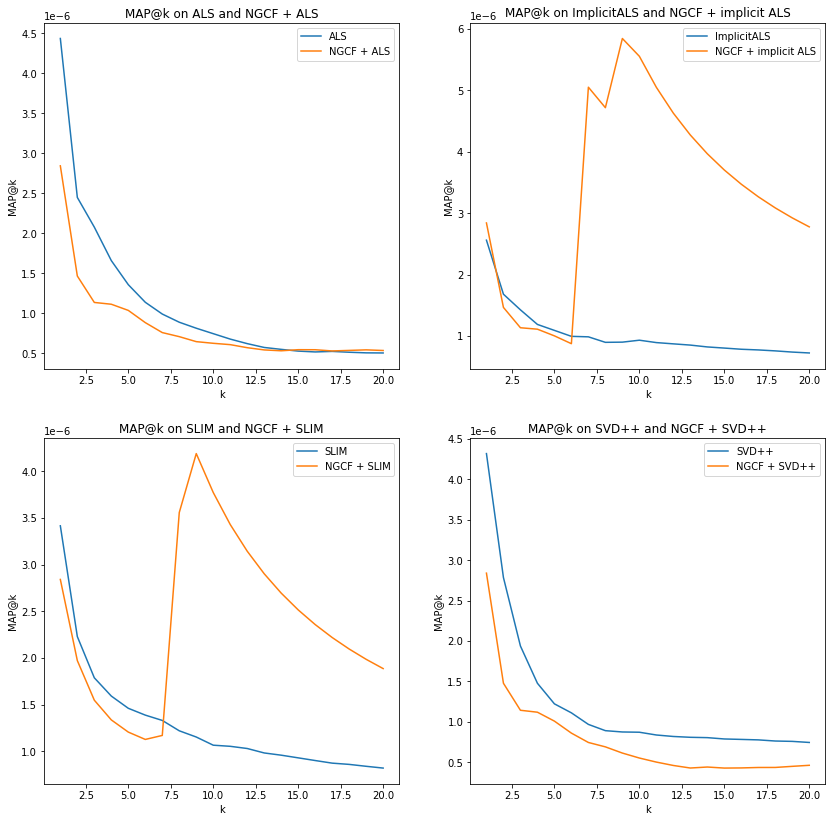

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(20)]
    precision_ngcf_method = [0 for _ in range(20)]
    for metric_name in df_max.index: 
        if 'MAP' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df_max.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df_max.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()

## 3. Сравнение подходов

In [69]:
metrics = ['MAP@1', 'MAP@10', 'MAP@20', 'MRR', 'NDCG', 'Precision@1', 'Precision@10', 'Precision@20']

### max(inference_1, inference_2)

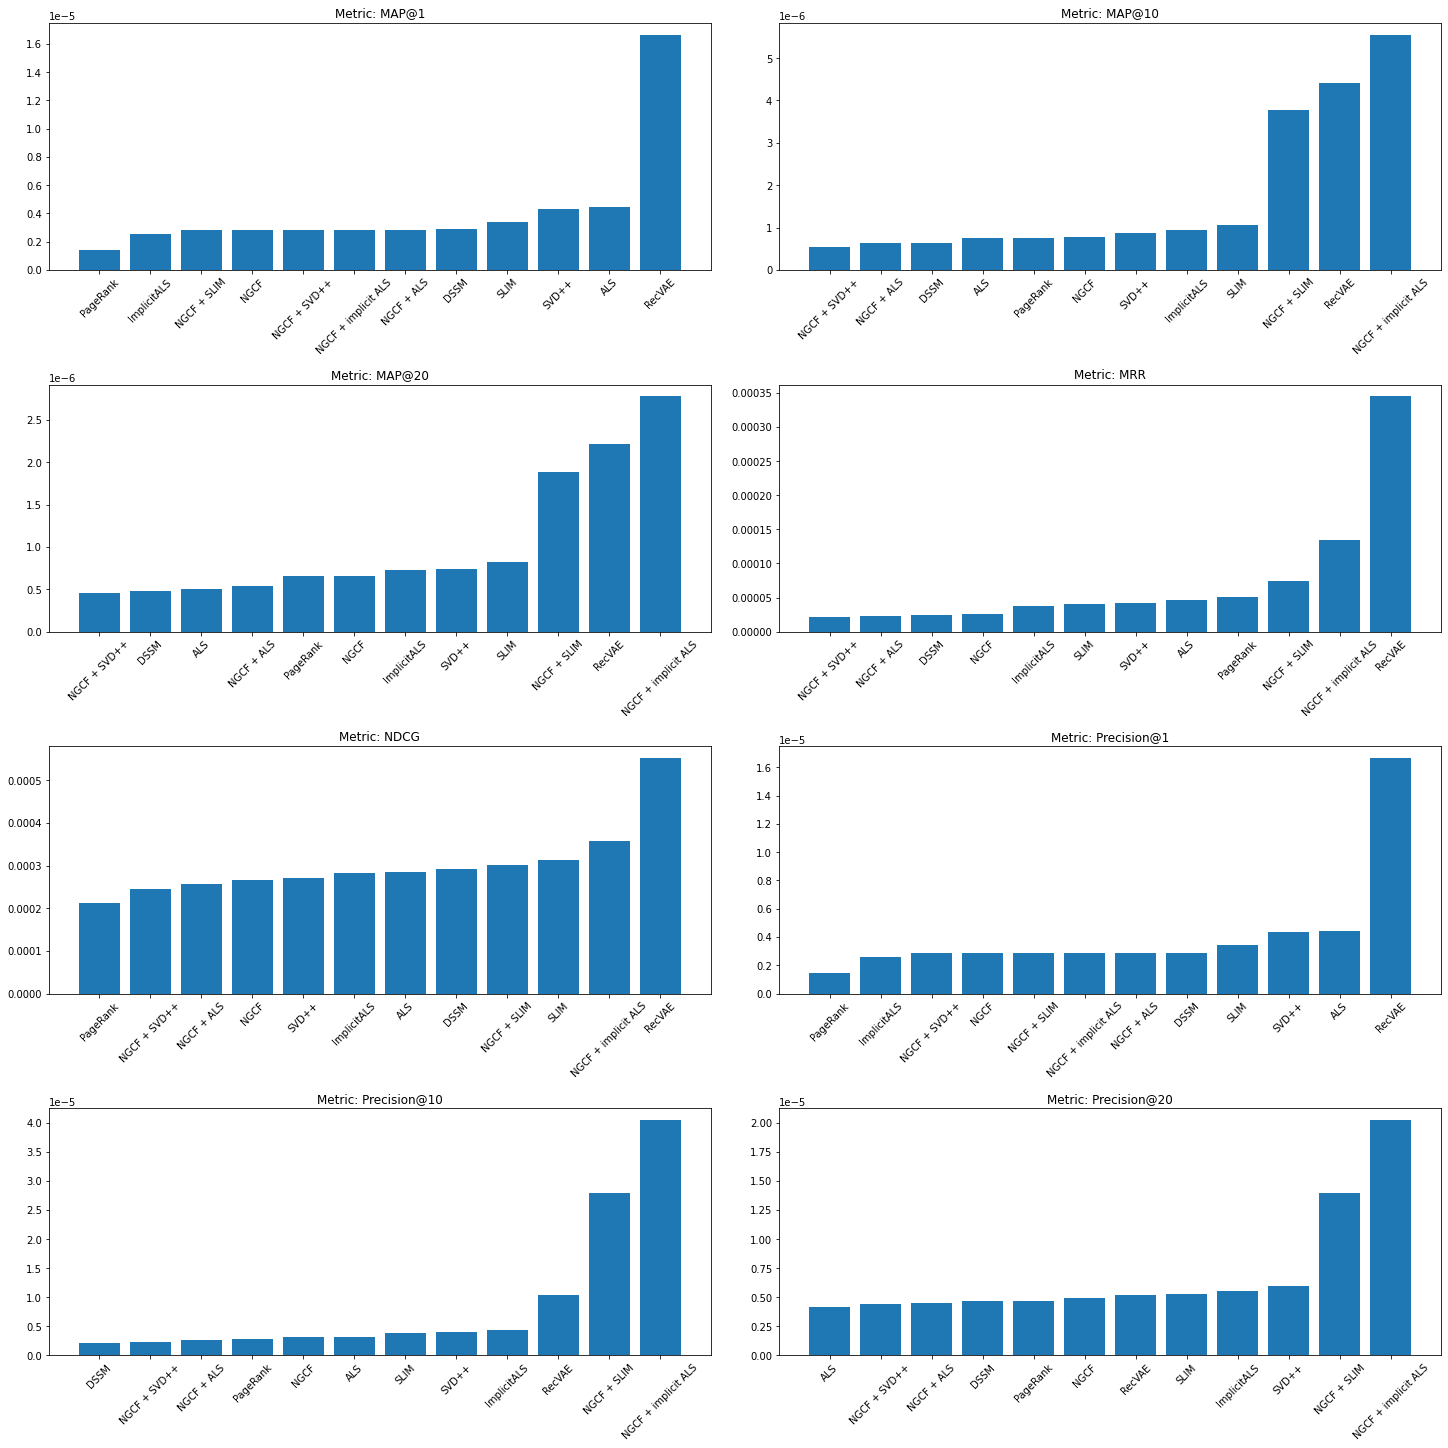

In [70]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_max = df_max.sort_values(by=metric, axis=1)
    x = df_max.loc[metric].index
    y = df_max.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   


### inference_1

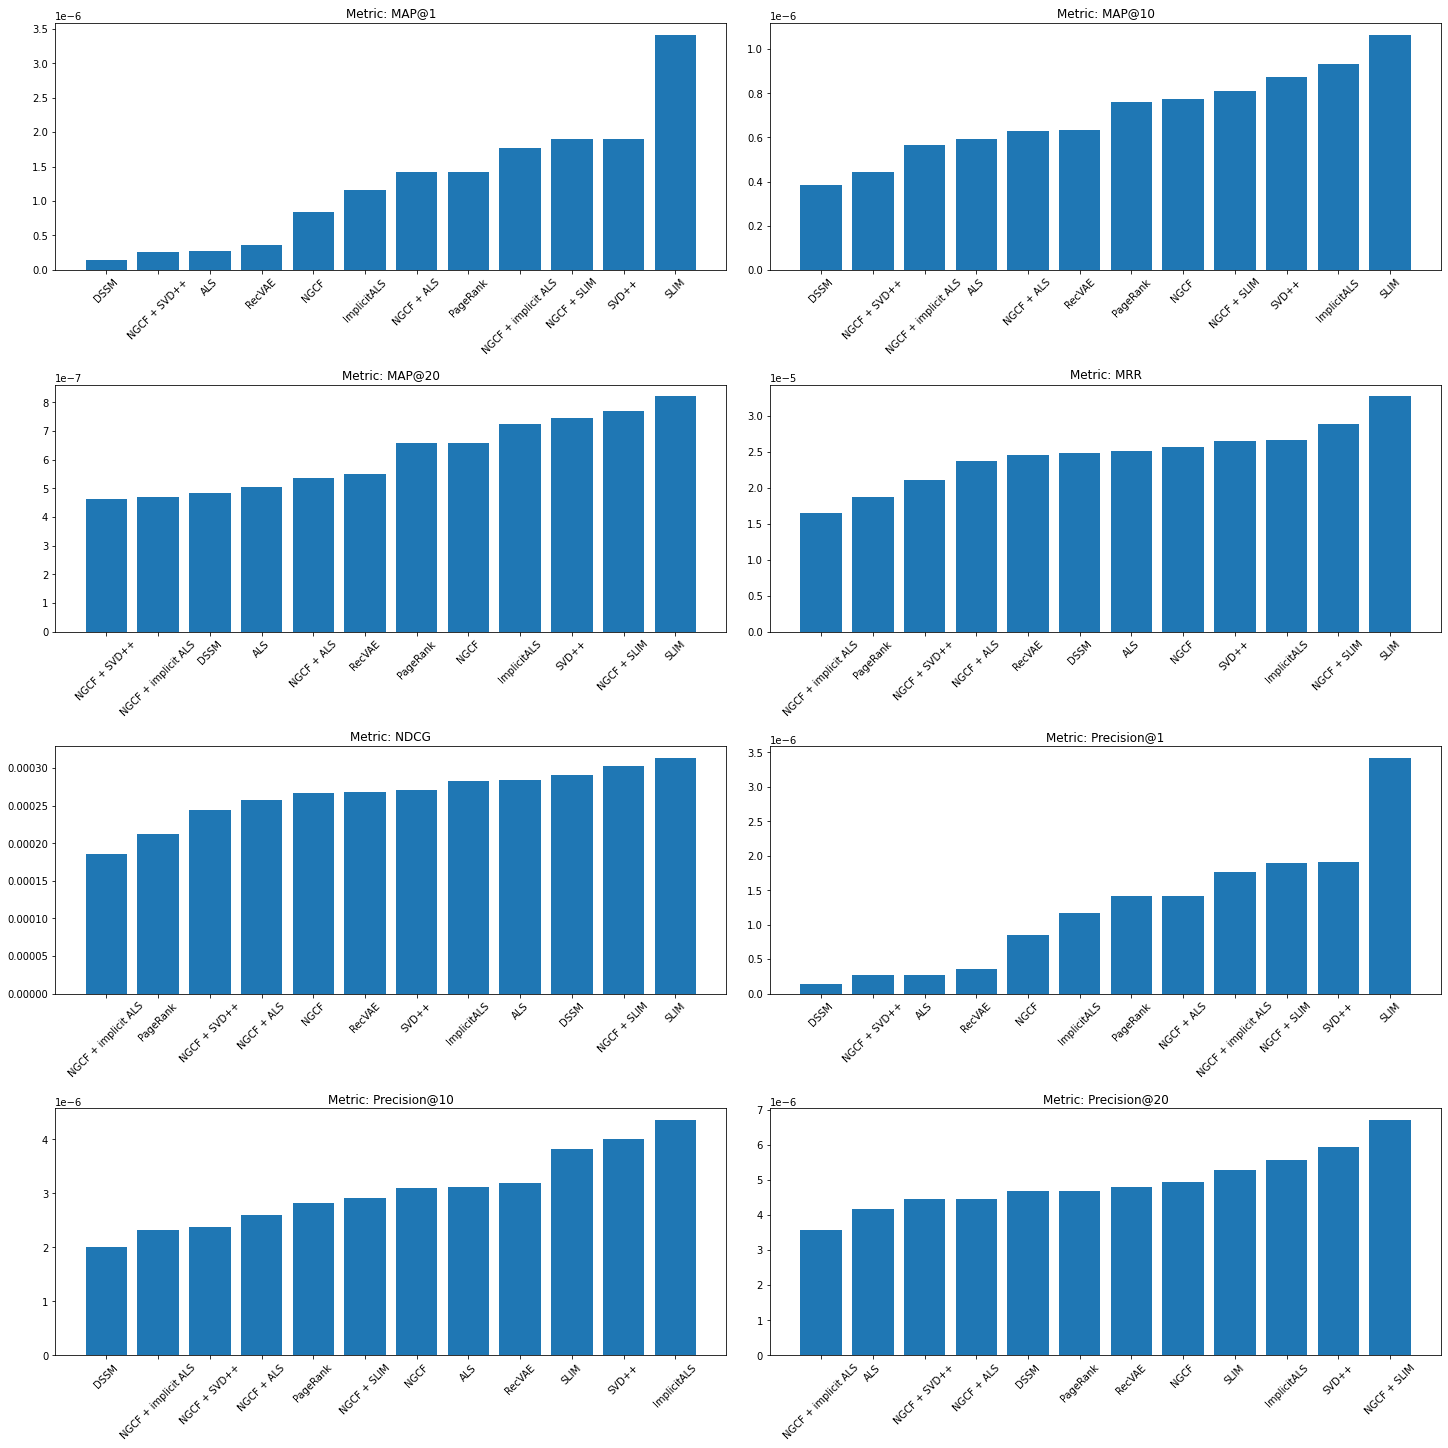

In [71]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_1 = df_1.sort_values(by=metric, axis=1)
    x = df_1.loc[metric].index
    y = df_1.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   


### inference 2

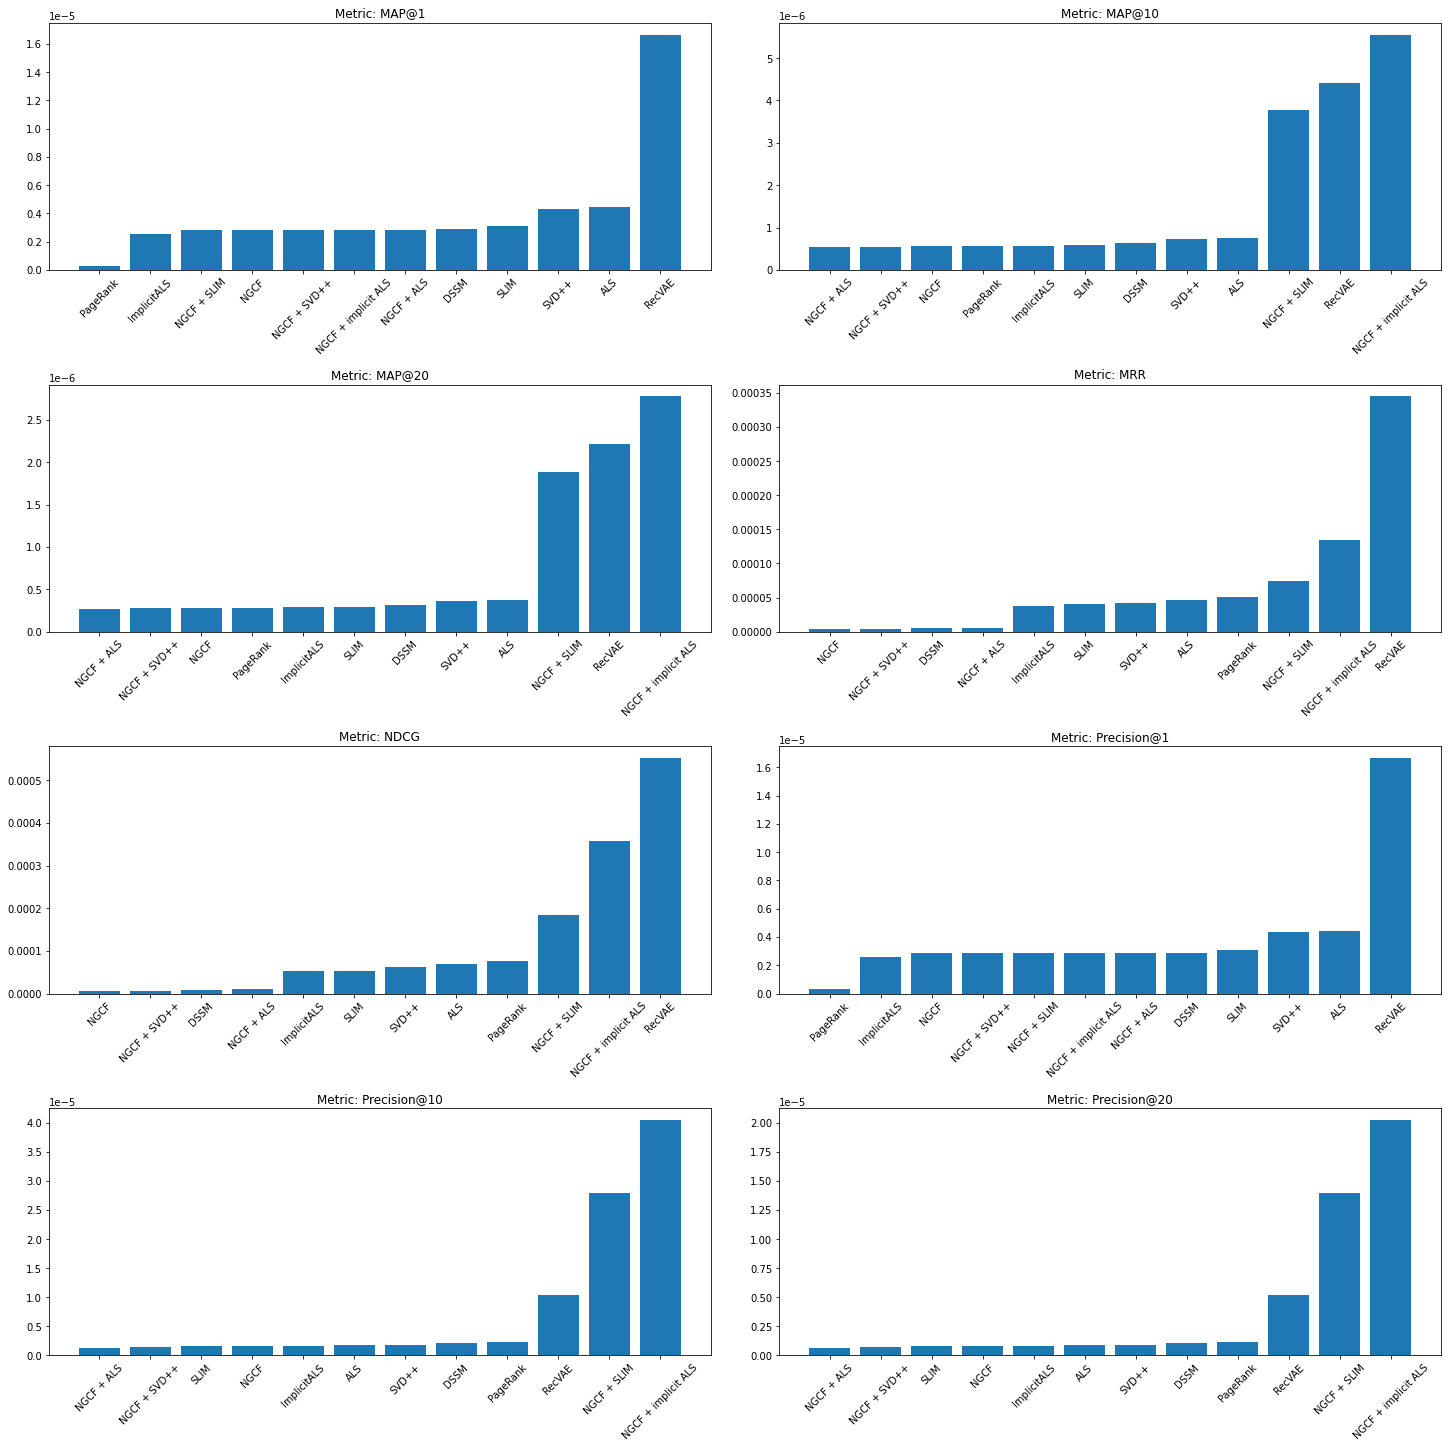

In [72]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_2 = df_2.sort_values(by=metric, axis=1)
    x = df_2.loc[metric].index
    y = df_2.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(45)

    axs[i // 2, i % 2].plot()
   


## Comparing inference 1 and inference 2

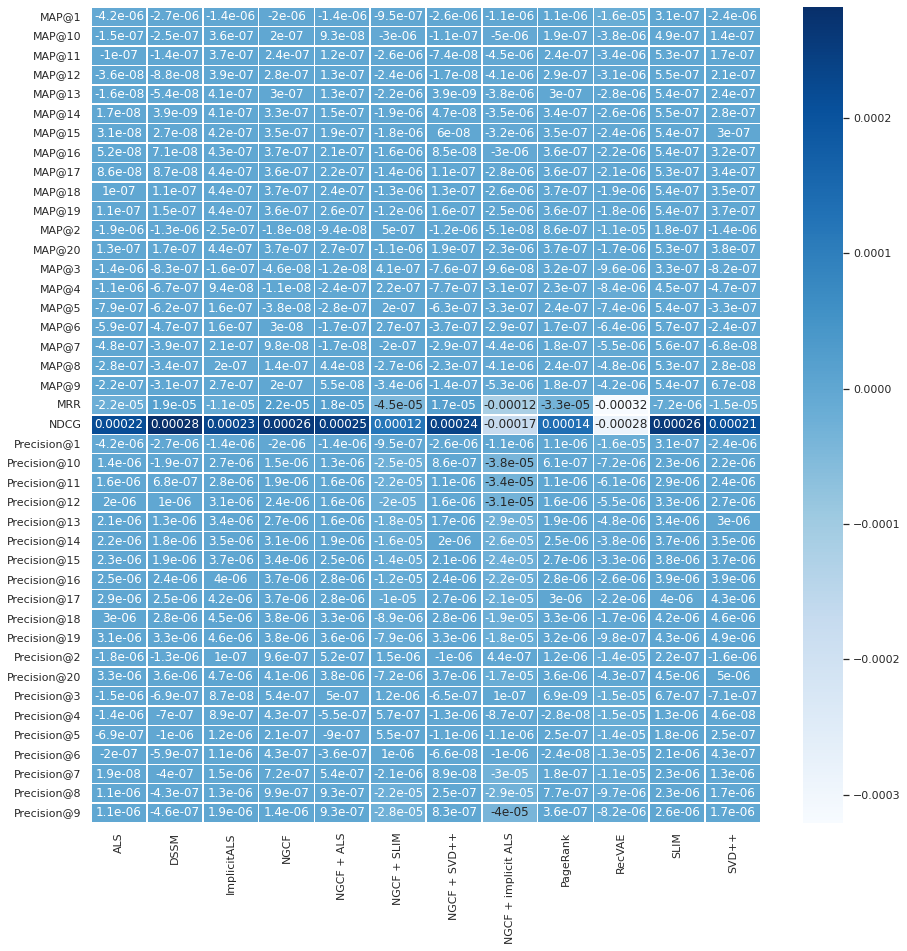

In [73]:
import seaborn as sns

df_diff = df_1 - df_2
sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(df_diff, annot=True, linewidths=0.5, cmap='Blues')


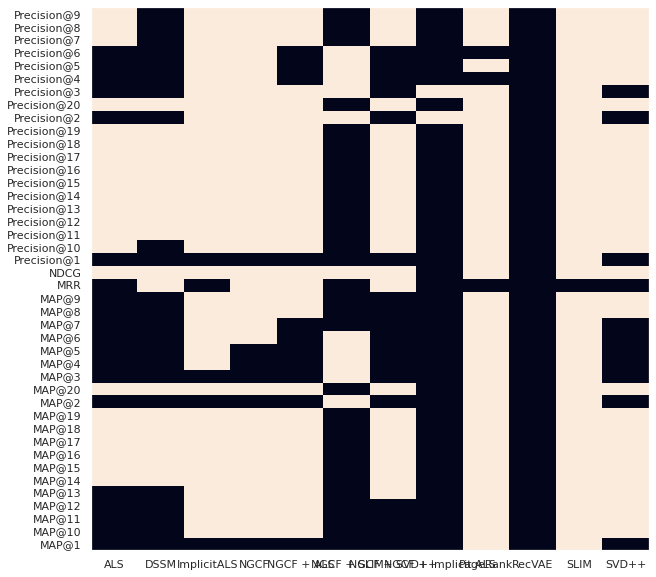

In [74]:
import seaborn as sns

df_diff = (df_1 - df_2) > 0

plt.figure(figsize=(10, 10))
plt.pcolor(df_diff)
plt.yticks(np.arange(0.5, len(df_diff.index), 1), df_diff.index)
plt.xticks(np.arange(0.5, len(df_diff.columns), 1), df_diff.columns)
plt.show()
